# Taller 2. Análisis de interacción genotipo por ambiente
Genética de rasgos complejos 2024-01 - Docente Johana Carolina Soto Sedano

__Hans D. Escobar H.__

In [37]:
# GGEBiplots has some issue with ggplot
options(warn = -1)

missing_packages <- character()
for (package in c(
  "GGEBiplots"
)) {
  if (!require(package, quietly = TRUE, character.only = TRUE)) {
    missing_packages <- append(missing_packages, package)
  }
}

if (length(missing_packages) > 0) {
  stop(
    sprintf(
      "Missing the following packages: %s",
      paste(missing_packages, collapse = ", ")
    ),
    call. = FALSE
  )
}


In [38]:
df <- read.delim(
  "Private_Data/cassava2.txt",
  row.names = 1
)
cat("Genotipos: ", nrow(df), "\n")
cat("Ambientes:
  \t- e1: Arauca
  \t- e2: La Vega
  \t- e3: Invernadero")


Genotipos:  100 
Ambientes:
  	- e1: Arauca
  	- e2: La Vega
  	- e3: Invernadero

In [39]:
head(df)


,e1,e2,e3
,<dbl>,<dbl>,<dbl>
g1,1.36,1.29,1.41
g2,1.39,1.15,1.37
g3,1.34,0.97,1.48
g4,1.38,1.29,1.61
g5,1.61,1.15,1.30
g6,1.48,1.35,1.63


## 1. Modelo genotipo + genotipo x ambiente  PCA

The vector view of the GGE biplot:

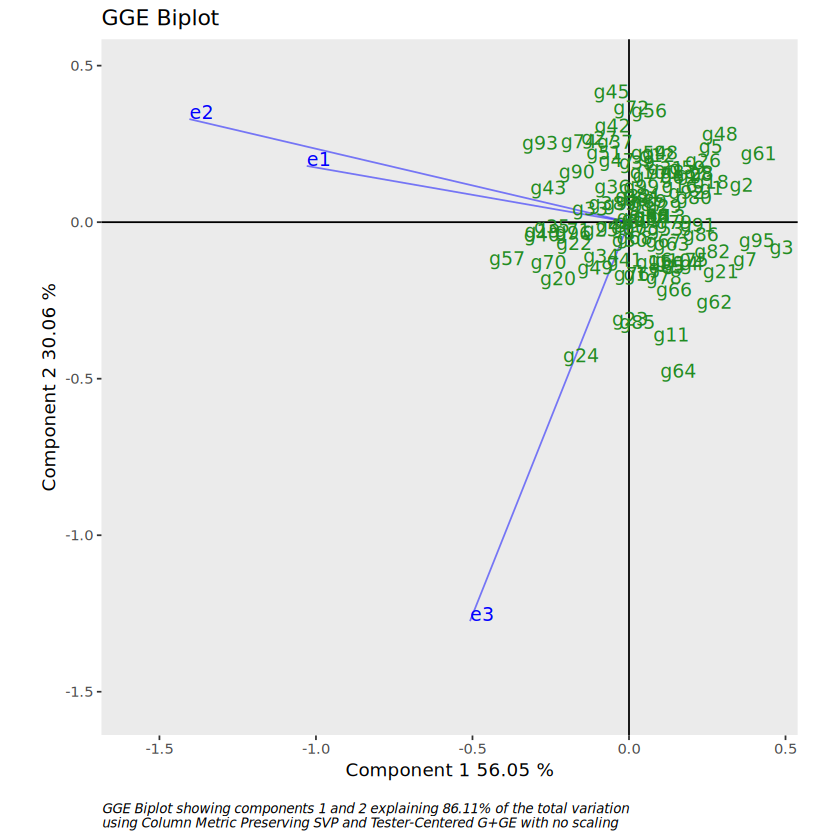

In [40]:
gge_model <- GGEModel(df)
GGEPlot(gge_model)


- __¿El comportamiento de los genotipos es más similar en qué ambientes?__
En Arauca (e1) y La Vega (e2) se presenta el comportamiento más similar. Los ángulos entre e1 y e2 son pequeños, mostrando fuerte correlación positiva (__cos__(angulo) ≈ coeficiente de correlación (Yan, 2019)); en contraste, Invernadero (e3) tiene correlación cercana a cero con e1 y e2.

## 2. Compare el comportamiento de dos genotipos entre los ambientes

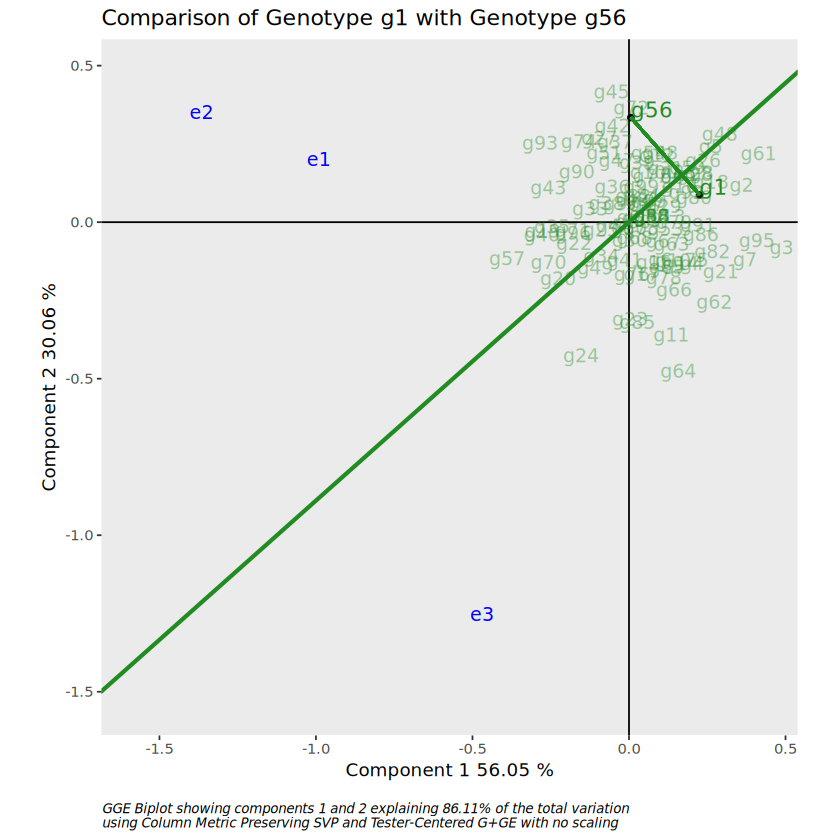

In [41]:
CompareGens(gge_model, G1 = "g1", G2 = "g56")

# No estoy seguro el significado del warning, pero también aparece
# con los datos de ejemplo del paquete, por lo que es un problema de
# como este hace uso de ggplot.
# Issue relacionado: https://github.com/tidyverse/ggplot2/issues/5762


- El genotipo g56 se desempeña mejor que g1 en Arauca (e1) y La Vega (e2). En invernadero (e3), g1 supera a g56.

## 3. Discrimination vs. representativeness biplot

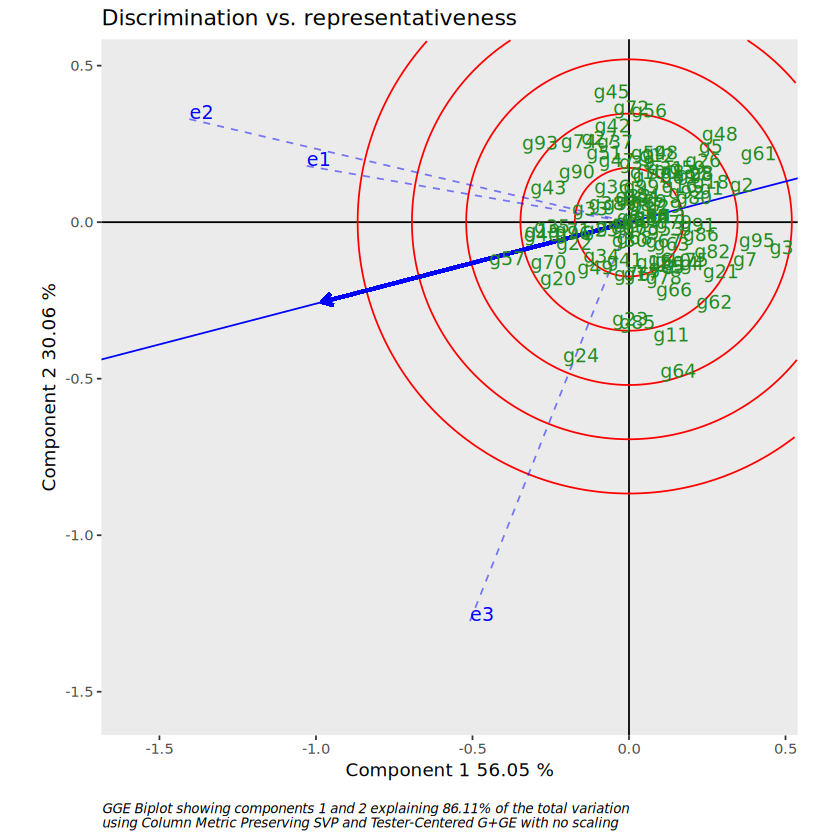

In [42]:
DiscRep(gge_model)


In [49]:
# Discrimination ability

vector_length <- function(row, components = 2) {
  sqrt(crossprod(row[1:components]))
}

capacidad_discriminante <- apply(
  gge_model$coordenviroment,
  MARGIN = 1, vector_length
)

# Representativeness ability

obtener_angulo <- function(vector1, vector2) {
  # A · B = |A| |B| cos(θ)
  norma1 <- sqrt(crossprod(vector1))
  norma2 <- sqrt(crossprod(vector2))
  acos(crossprod(vector1, vector2) / (norma1 * norma2))
}

average_environment_coordinate <- apply(
  gge_model$coordenviroment[, 1:2],
  MARGIN = 2, mean
)

representatividad <- apply(
  gge_model$coordenviroment[, 1:2],
  MARGIN = 1, obtener_angulo, vector2 = average_environment_coordinate
)

# summary

data.frame(
  capacidad_discriminante, representatividad,
  row.names = gge_model$labelenv
)


,capacidad_discriminante,representatividad
,<dbl>,<dbl>
e1,1.044955,0.4273446
e2,1.442443,0.4848585
e3,1.371863,0.9369504


- La longitud de vector se aproxima a la desviación estándar del ambiente, la cual es una medida de la capacidad discriminante del ambiente (Yan, 2019). En estos datos:

  - La Vega (e2) tiene la mayor capacidad discriminante, seguida estrechamente por el Invernadero (e3).
  - Arauca (e1) es el vector mas corto; por lo tanto, en este ambiente los genotipos son mas similares.

- El angulo entre el vector de un ambiente y el eje AEC (_average environment coordinate_) es una medida de la representatividad del ambiente (Yan, 2019). En estos datos, Arauca (e1) seguido por La Vega (e2) son los mas representativos.

- La Vega (e2) es discriminante y representativo, por lo que es un ambiente de prueba adecuado.

## Bibliografía

- Dumble, S. (2022). GGEBiplots: GGE Biplots with “ggplot2” (v0.1.3) [R]. https://CRAN.R-project.org/package=GGEBiplots

- Yan, W. (2019). GGE BIPLOT ANALYSIS: A graphical tool for breeders, geneticists, and agronomists. CRC PRESS.
